<a href="https://colab.research.google.com/github/IronZiiz/data-science_Visualization/blob/main/HW_Trend_imigration_Latin_America.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework Challenge
Your task is to create a figure showing immigration trends for four major Latin American countries: Brazil, Argentina, Peru, and Colombia.

Requirements:
Include a title and axis labels.
Use appropriate colors to differentiate each country.
Consider accessibility, ensuring clarity and readability for all viewers.
Make sure your visualization is clear, well-structured, and effectively communicates the data.

In [2]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Alura/Data_Visualization:criando-gráficos-com-bibliotecas-Python/DV-Immigrants-project/imigrantes_canada.csv")

In [4]:
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [5]:
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
# Aplicando tema do Seaborn
sns.set_theme(style="whitegrid", context="talk")  # "talk" deixa os textos maiores e mais legíveis

In [7]:
df.set_index('País', inplace = True)

In [8]:
anos = list(map(str, range(1980, 2014)))
df_filtrado = df.loc[["Brasil", "Argentina", "Peru", "Colômbia"], anos]
df_filtrado

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
País,,,,,,,,,,,,,,,,,,,,,
Brasil,211,220,192,139,145,130,205,244,394,650,...,917,969,1181,1746,2138,2509,2598,1508,1642,1714
Argentina,368,426,626,241,237,196,213,519,374,538,...,1591,1153,847,620,540,467,459,278,263,282
Peru,317,456,401,241,306,328,628,843,1237,1667,...,1460,1653,1473,1490,1094,1884,1283,886,787,682
Colômbia,266,326,360,244,235,214,257,376,352,439,...,4566,6424,6535,5357,5452,4652,5218,4366,3741,3631


In [9]:
# Converter para formato longo (long format)
df_long = df_filtrado.reset_index().melt(id_vars="País", var_name="Ano", value_name="Valor")

# Converter "Ano" para inteiro
df_long["Ano"] = df_long["Ano"].astype(int)

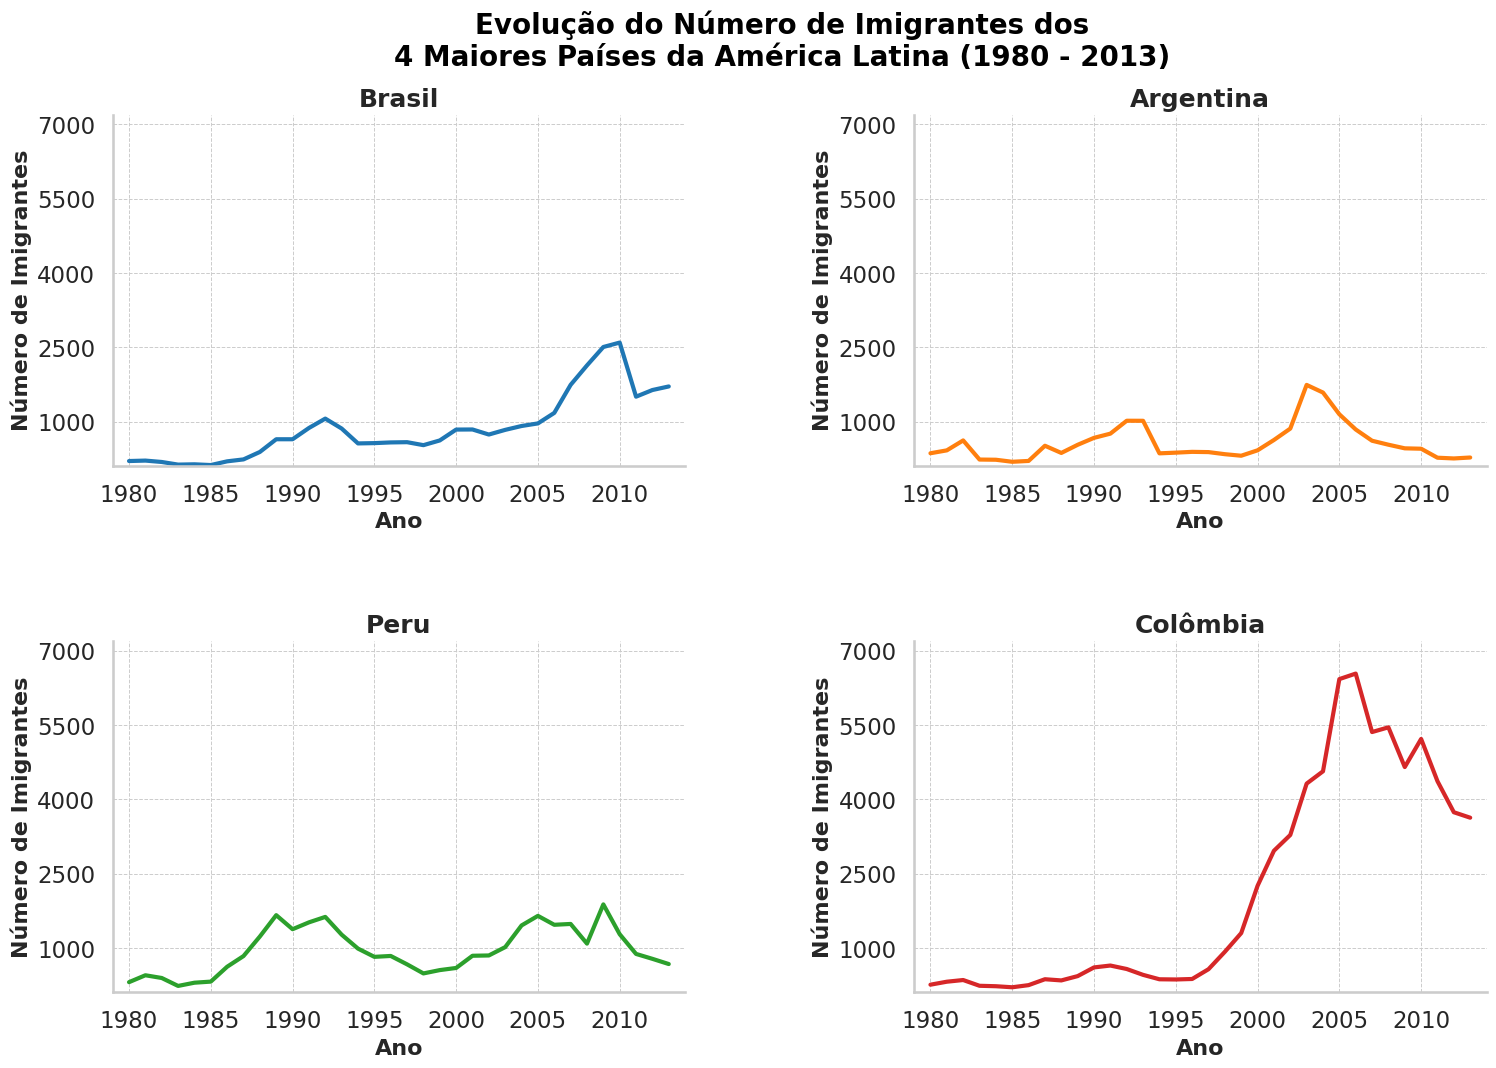

In [10]:

# Aplicar um tema do Seaborn
sns.set_theme(style="whitegrid", context="talk")

# FacetGrid para visualizar a evolução temporal por país
g = sns.FacetGrid(df_long, col="País", col_wrap=2, sharey=False, sharex=False, height=5, aspect=1.5, palette="tab10")

# Definir cores específicas para cada gráfico
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Azul, Laranja, Verde, Vermelho

# Mapear o gráfico de linha para cada país com cores distintas
for ax, (pais, cor) in zip(g.axes.flat, zip(df_long["País"].unique(), colors)):
    sns.lineplot(data=df_long[df_long["País"] == pais], x="Ano", y="Valor", ax=ax, lw=3, color=cor)
    ax.set_title(pais, fontsize=18, weight="bold")  # Definir título de cada gráfico

g.fig.suptitle(
    "Evolução do Número de Imigrantes dos\n4 Maiores Países da América Latina (1980 - 2013)",
    fontsize=20,
    fontweight="bold",
    y=1.05,
    ha='center',  # Alinha o título ao centro
    color="black",  # Cor do título para melhor contraste
)


for ax in g.axes.flat:
    ax.set_xticks(range(1980, 2014, 5))  # Exibe de 5 em 5 anos
    ax.set_xticklabels(range(1980, 2014, 5))
    ax.set_xlim(1979, 2014)
    ax.set_ylim(df_long["Valor"].min() * 0.9, df_long["Valor"].max() * 1.1)
    ax.set_yticks(range(1000, 7500, 1500))  # Ajuste dos ticks no eixo Y
    ax.set_xlabel("Ano", fontsize=16, weight='bold')  # Rótulo do eixo X para cada gráfico
    ax.set_ylabel("Número de Imigrantes", fontsize=16, weight='bold')  # Rótulo do eixo Y para cada gráfico
    ax.grid(True, which='both', axis='both', linestyle='--', linewidth=0.7)


plt.subplots_adjust(hspace=0.5, wspace=0.4)  # Ajuste o valor de hspace para aumentar ou diminuir o espaçamento vertical

# Mostrar o gráfico
plt.show()
